In [3]:
import math
import collections
import itertools

In [1]:
import numpy as np

In [ ]:
np.abs

In [29]:
S = '{[()()]}'
#S = '([)()]'
#S = '())))'
S = '(((((())))))(()'

In [33]:
import collections

def solution(S):
    
    correct = {'(':')', '[':']', '{':'}' }
    Q = collections.deque()
    
    for c in S:
        # print(c)
        if c in '([{':
            Q.append(c)
        elif c in ')]}':
            
            if len(Q) == 0:
                return 0
            
            if correct[Q[-1]] == c:
                Q.pop()
            else:
                return 0
    
    if len(Q) == 0:
        return 1
    else:
        return 0

In [34]:
solution(S)

0

In [32]:
Q

deque(['{', '[', '(', '('])

In [29]:
sum_intersects

11

In [30]:
nb_active_disks

0

In [36]:
I = [0, 1, 2, 3]
list(map(lambda x: 2*x, I))


[0, 2, 4, 6]

In [42]:
I = [0, 1, 2, 3]
A = ['a', 'b', 'c', 'd']
list(map(lambda x, y: str(x)+y, I, A))

['0a', '1b', '2c', '3d']

In [64]:
list(filter(lambda x: x%2==0, [0, 1, 2, 3]))

[0, 2]

In [65]:
reduce

NameError: name 'reduce' is not defined

In [66]:
lambda x : 2*x

<function __main__.<lambda>(x)>

In [53]:
max(list(map(str, [0, 1, 2])))

'2'

# Algorithms

### Prefix Sum

In [99]:
arr = [1, 2, 3, 4, 5]                          # given array
acc = [0] + list(itertools.accumulate(IR))     # each element contains SUM of all PREVIOUS entries in 'arr'
print('Original array:', arr)
print('Prefix sum arr:', acc)

Original array: [1, 2, 3, 4, 5]
Prefix sum arr: [0, 1, 3, 6, 10, 15]


In [ ]:
start, end = 1, 4      # both inclusive
sum_subarr = acc[end+1] - acc[start]
sum_subarr

### Leader

Find the leader in the array. Leader is element that occurs more than n/2 times.

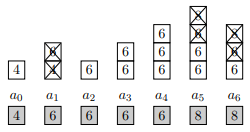

Notice that if the sequence a0, a1,...,an≠1 contains a leader, then after removing a pair of elements of dierent values, the remaining sequence still has the same leader. Let’s create an empty stack onto which we will be pushing consecutive elements. After each such operation we check whether the two elements at the top of the stack are dierent. If they are, we remove them from the stack. In fact, we don’t need to remember all the elements from the stack, because all the values
below the top are always equal. It is sucient to remember only the values of elements and the size of the stack.

Link: [https://codility.com/media/train/6-Leader.pdf](https://codility.com/media/train/6-Leader.pdf)

In [35]:
A = [6, 8, 4, 6, 8, 6, 6]

In [39]:
def goldenLeader(A):
    n = len(A)
    size = 0
    
    for k in range(n):
        if (size == 0):
            size += 1
            value = A[k]
        else:
            if (value != A[k]):
                 size -= 1
            else:
                 size += 1
    
    candidate = -1
    if (size > 0):
        candidate = value
    
    leader = -1
    count = 0
    
    for k in range(n):
        if (A[k] == candidate):
            count += 1
    if (count > n // 2):
        leader = candidate
    
    return leader

In [40]:
goldenLeader(A)

6

### Maximum Subarray

In [1]:
A = [-2, -3, 4, -1, -2, -1, 5, -3]
A = [3, 2, -6, 4, 0]

In [2]:
def solution(A):
    max_ending_here = -1000000
    max_so_far = -1000000
    
    for a in A:
        max_ending_here = max(max_ending_here + a, a)
        max_so_far = max(max_so_far, max_ending_here)
        
    
    return max_so_far

In [3]:
max_subarray(A)

5

# Exercises

### NumberOfDiscIntersections (Lesson 6)

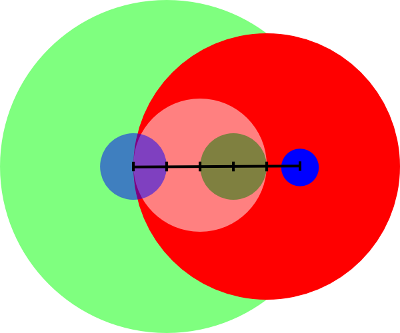

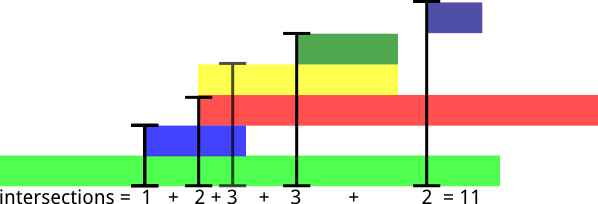

In [35]:
Event = collections.namedtuple('Event', ['x', 'v'])

A = [1, 5, 2, 1, 4, 0]

def solution(A):
    # extract events: disk begins or ends
    events = []
    for x in range(len(A)):
        radius = A[x]
        events.append(Event(x-radius,  1))
        events.append(Event(x+radius, -1))
        
    # sort events by x ascending, then by v descending
    events = sorted(events, key=lambda event: (event.x, -event.v))
    events
    
    sum_intersects = 0
    nb_active_disks = 0
    
    for ev in events:
        if ev.v > 0:
            sum_intersects += nb_active_disks
            nb_active_disks += 1
        else:
            nb_active_disks -= 1
            
        if sum_intersects > 10000000:
            return -1
            
    return sum_intersects

solution(A)

11